Ideen für diverse Visualisierungen

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

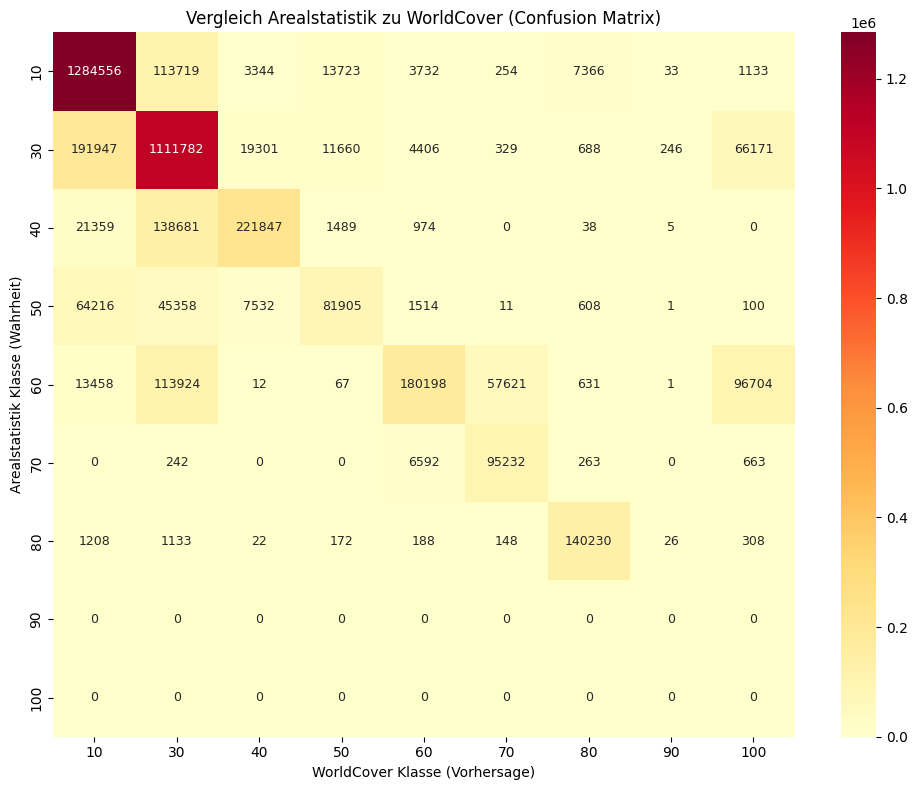

In [2]:
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# GeoDataFrame laden
df = gpd.read_file("../../../../data/analysis/worldcover/arealstatistik_mapped_2020_v2.gpkg")

# Klassen vergleichen
y_true = df["AS_auf_WorldCover"]
y_pred = df["WorldCover_2020_class_1"]

# Alle Klassen bestimmen
labels = sorted(set(y_true).union(set(y_pred)))

# Confusion Matrix erstellen
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Größe und Schrift dynamisch anpassen
fig_width = max(10, len(labels) * 0.5)
fig_height = max(8, len(labels) * 0.5)

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", 
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 9})

plt.title("Vergleich Arealstatistik zu WorldCover (Confusion Matrix)")
plt.xlabel("WorldCover Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Werte zwichen speichern um Diagramm anzupassen

In [3]:
import pandas as pd

# cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df.to_csv("confusion_matrix.csv")


Matrix neuladen zum darstellen

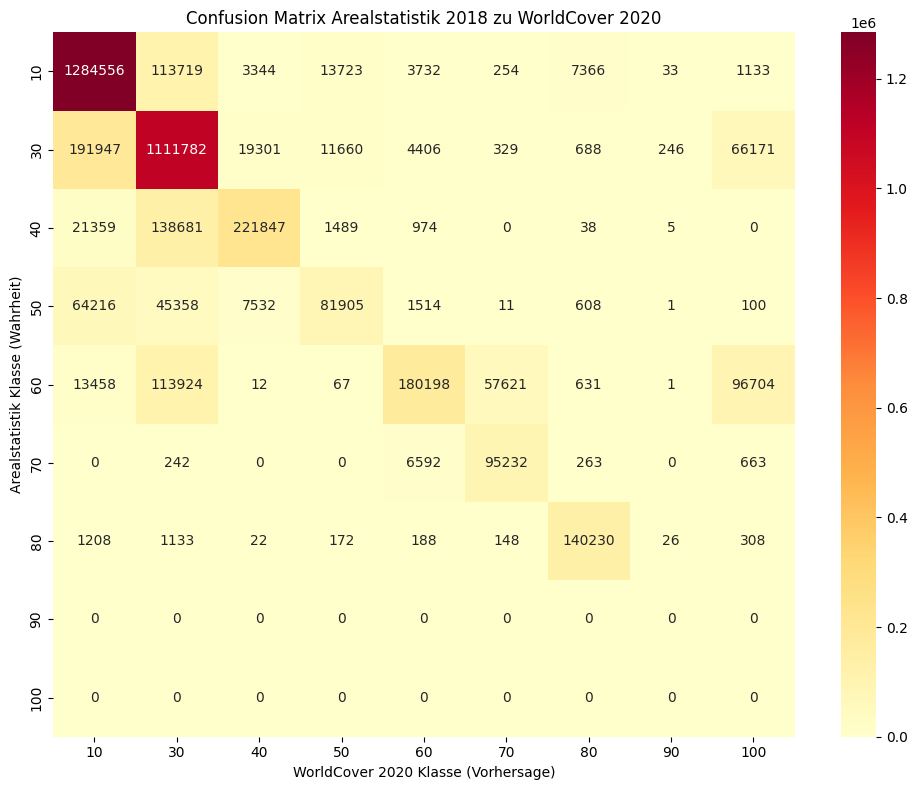

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Visualisieren als Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlOrRd",
            xticklabels=cm_df.columns, yticklabels=cm_df.index)
plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Prozentuale Verteilung der Klassen in Arealstatistik und WorldCover

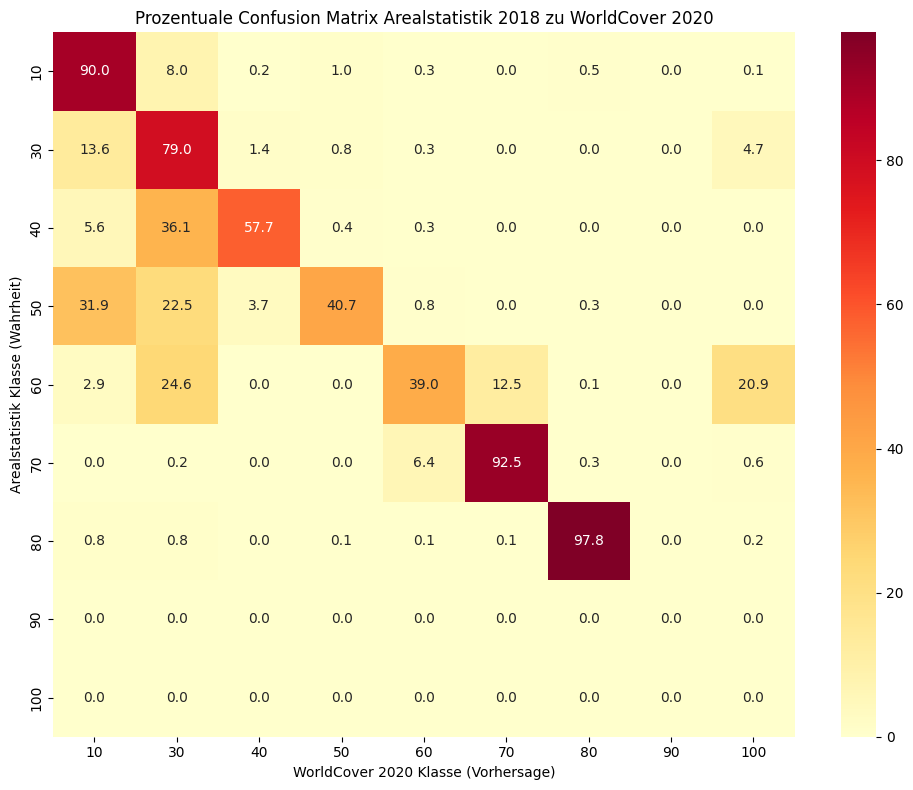

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100

cm_percent = cm_percent.fillna(0.0)


# Heatmap mit Prozentwerten
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="YlOrRd",
            xticklabels=cm_df.columns, yticklabels=cm_df.index)
plt.title("Prozentuale Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse (Vorhersage)")
plt.ylabel("Arealstatistik Klasse (Wahrheit)")
plt.tight_layout()
plt.show()


Labels anpassen von Zahlen zu Klassenbezeichnungen

In [1]:
label_names = {
    10: "Baumbestand",
    20: "Shrubland",
    30: "Wiese",
    40: "Ackerland",
    50: "Aufgebaut",
    60: "Karge / spärliche Vegetation",
    70: "Schnee und Eis",
    80: "Dauerhafte Gewässer",
    90: "Krautiges Feuchtgebiet",
    100: "Moos und Flechten"
}

C:\Users\alexa\AppData\Local\Temp\ipykernel_21704\4272669777.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%") # Zahlen mit Prozentzeichen


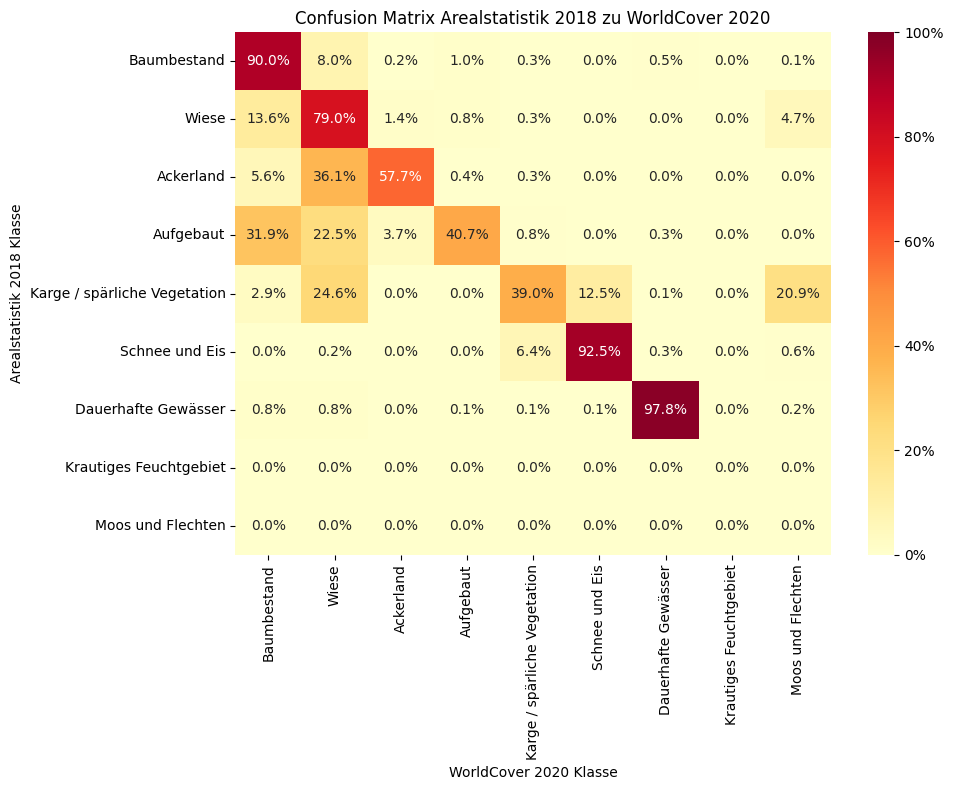

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV laden
cm_df = pd.read_csv("confusion_matrix.csv", index_col=0)

# Prozentwerte pro Zeile berechnen
cm_percent = cm_df.div(cm_df.sum(axis=1), axis=0) * 100

cm_percent = cm_percent.fillna(0.0)

# Erst Spaltennamen als Integer umwandeln
cm_percent.columns = cm_percent.columns.astype(int)
cm_percent.index = cm_percent.index.astype(int)  # Optional, falls index auch als String ist

# Dann Mapping anwenden
cm_percent_named = cm_percent.rename(index=label_names, columns=label_names)

annot_matrix = cm_percent_named.applymap(lambda x: f"{x:.1f}%") # Zahlen mit Prozentzeichen

# Heatmap mit vmin/vmax (maximaler Wert = 100)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    cm_percent_named,
    annot=annot_matrix,
    fmt="",
    cmap="YlOrRd",
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True,
    vmin=0, vmax=100  # Wichtig!
)
plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

# Colorbar anpassen
colorbar = ax.collections[0].colorbar
ticks = [0, 20, 40, 60, 80, 100]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([f"{tick}%" for tick in ticks])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()





Selbes mit absoulten Werten

C:\Users\alexa\AppData\Local\Temp\ipykernel_21704\1403201368.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  abs_annot = abs_matrix.applymap(swiss_format)


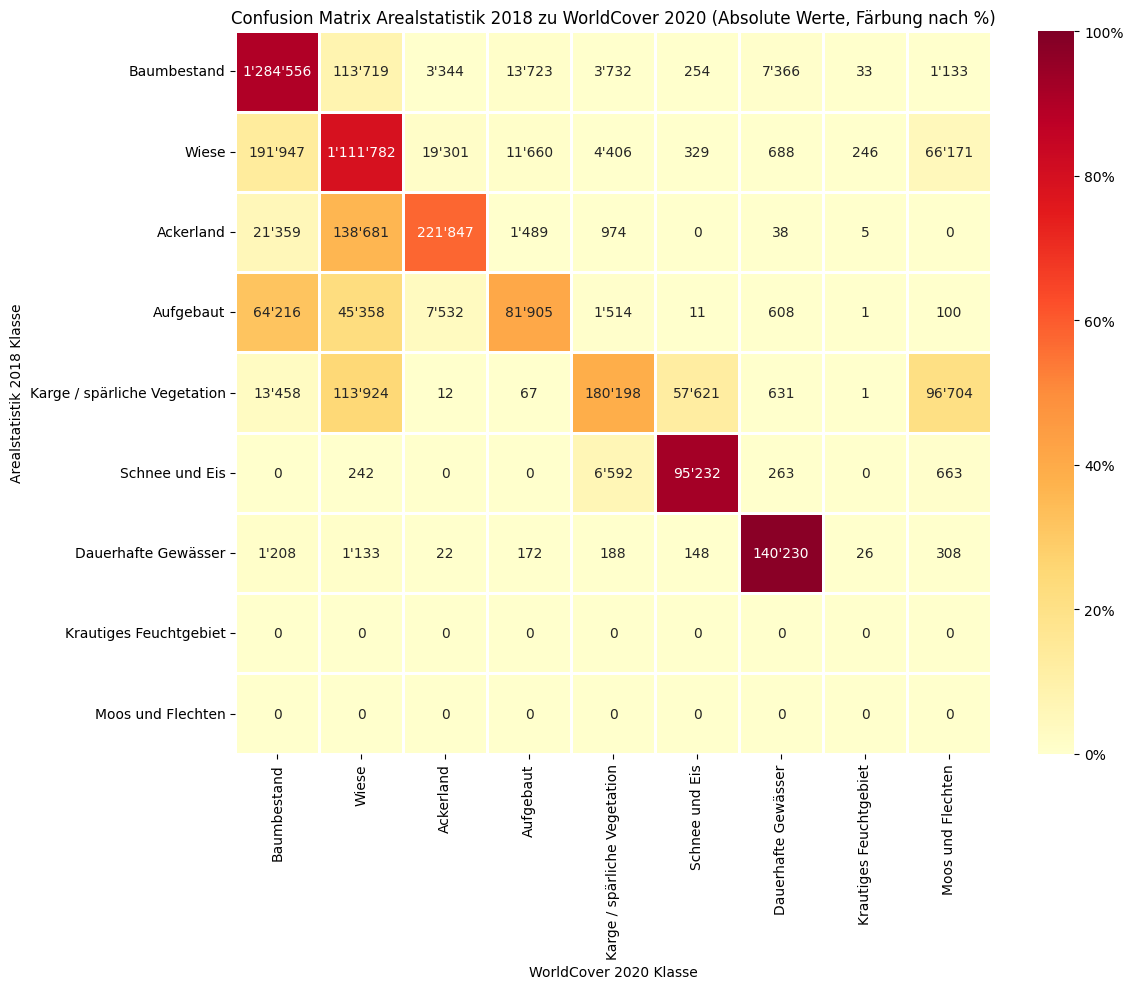

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eigene Tausendertrennung mit Hochkomma
def swiss_format(x):
    return f"{int(x):,}".replace(",", "'")

abs_matrix = cm_df.rename(index=label_names, columns=label_names)
abs_annot = abs_matrix.applymap(swiss_format)

plt.figure(figsize=(12, 10))  # Größere Felder durch mehr Platz!
ax = sns.heatmap(
    cm_percent_named,
    annot=abs_annot,
    fmt="",
    cmap="YlOrRd",
    xticklabels=cm_percent_named.columns,
    yticklabels=cm_percent_named.index,
    cbar=True,
    vmin=0, vmax=100,
    linewidths=2  # Noch klarere Abtrennung
)

plt.title("Confusion Matrix Arealstatistik 2018 zu WorldCover 2020 (Absolute Werte, Färbung nach %)")
plt.xlabel("WorldCover 2020 Klasse")
plt.ylabel("Arealstatistik 2018 Klasse")
plt.tight_layout()

colorbar = ax.collections[0].colorbar
ticks = [0, 20, 40, 60, 80, 100]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([f"{tick}%" for tick in ticks])
colorbar.set_label("", rotation=270, labelpad=20)

plt.show()



Prozent mit Farbe und Beschriftung in den Zellen nicht klar unterscheidbar
Zahlen weg 
Dreieckig halbieren, Hälften verschieden einfärben
Grösse der Zellen anpassen

small multiples nebeneinander, einmal absoult einmal relativ

0 werte läschen / weiss machen, Farbskala Fixe Kategorien z.B. 10 % Schritte

Produzenten / Senken, Zunahmen / Abnahmen bei zeitlichen Vergleichen